In [29]:
import numpy as np
from IPython.display import Image

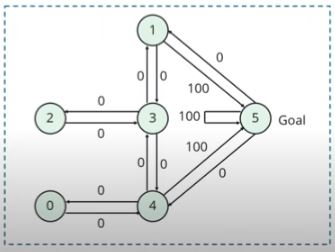

In [30]:
                 # 0   1   2   3   4   5
R = np.matrix( [ [-1, -1, -1, -1,  0, -1],
                 [-1, -1, -1,  0, -1, 100],
                 [-1, -1, -1,  0, -1, -1],
                 [-1,  0,  0, -1,  0, -1],
                 [0,  -1, -1,  0, -1, 100],
                 [-1,  0, -1, -1,  0, 100] ] )
R

matrix([[ -1,  -1,  -1,  -1,   0,  -1],
        [ -1,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,   0,  -1,  -1],
        [ -1,   0,   0,  -1,   0,  -1],
        [  0,  -1,  -1,   0,  -1, 100],
        [ -1,   0,  -1,  -1,   0, 100]])

In [31]:
Q = np.matrix(np.zeros([6,6]))
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [32]:
gamma = 0.8

In [33]:
initial_state = 1

In [34]:
def available_actions(state):
    current_state_row = R[state, ]
    av_actions = np.where(current_state_row >= 0) [1]
    return av_actions

In [35]:
available_act = available_actions(initial_state)
available_act

array([3, 5], dtype=int64)

In [36]:
def sample_next_action(available_act_range):
    next_action = int(np.random.choice(available_act_range, 1))
    return next_action

In [38]:
action = sample_next_action(available_act)
action

C:\Users\vmaniara\AppData\Local\Temp\ipykernel_23616\466175205.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act_range, 1))


3

In [39]:
#Q(state, action) = R(state, action) + gamma * Max(Q(next state, all actions))
def update(current_state, action, gamma):
    max_index = (np.where(Q[action,] == np.max(Q[action, ]))) [1]
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, 1))
    else:
        max_index = int(max_index)
        
    Q[current_state, action] = R[current_state, action] + gamma * Q[action, max_index]
    #print("currentstate and max of all possible actions: ", current_state, np.where(np.max(Q[action, max_index])))
    return

In [40]:
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

## Training

In [41]:
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    ava_action = available_actions(current_state)
    action = sample_next_action(ava_action)
    update(current_state, action, 0.8)

C:\Users\vmaniara\AppData\Local\Temp\ipykernel_23616\466175205.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act_range, 1))
C:\Users\vmaniara\AppData\Local\Temp\ipykernel_23616\2325528265.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, 1))
C:\Users\vmaniara\AppData\Local\Temp\ipykernel_23616\2325528265.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = in

In [42]:
print(Q/np.max(Q) *100)

[[  0.           0.           0.           0.          70.25226083
    0.        ]
 [  0.           0.           0.          64.           0.
  100.        ]
 [  0.           0.           0.          64.           0.
    0.        ]
 [  0.          80.          51.2          0.          70.25226083
    0.        ]
 [ 56.20180866   0.           0.          56.20180866   0.
   87.81532604]
 [  0.          80.           0.           0.          70.25226083
  100.        ]]


## Testing

In [245]:
current_state = 3
steps = [current_state]
while current_state !=5:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    
    if (next_step_index.shape[0] > 1):
        next_step_index = int(np.random.choice(next_step_index, 1))
    else:
        next_step_index = int(next_step_index)
    print(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
        
print(steps)     

4
5
[3, 4, 5]


ERROR: Invalid requirement: "'gym[atari]'"
